In [129]:
import numpy as np
from PQmodel import PQ 
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from Tools import *
plt.rcParams.update({'font.size': 24})
plt.rcParams["font.family"] = "Times New Roman"


In [130]:
catalog=['Pure sinusoidal', 'Sag', 'Swell','Interruption','Transient',
         'Oscillatory','Harmonics','Harmonics with Sag', 'Harmonics with Swell',
         'Flicker', 'Flicker with Sag', 'Flicker with Swell', 'Sag with Oscillatory transient',
         'Swell with Oscillatory transient', 'Sag with Harmonics', 'Swell with Harmonics', 'Notch',
         'Harmonics with Sag with Flicker', 'Harmonics with Swell with Flicker',  'Sag with Harmonics with Flicker',
         'Swell with Harmonics with Flicker', 'Sag with Harmonics with Oscillatory transient',
         'Swell with Harmonics with Oscillatory transient', 'Harmonics with Sag with Oscillatory transient',
         'Harmonics with Swell with Oscillatory transient','Harmonics with Sag with Flicker with Oscillatory transient',
         'Harmonics with Swell with Flicker with Oscillatory transient', 'Sag with Harmonics with Flicker with Oscillatory transient',
         'Swell with Harmonics with Flicker with Oscillatory transient']

In [121]:
ciclos = 10
freq =60
fs =3600
mpc= fs/freq
Model = PQ(Cicles=ciclos,FS=fs,Frecuency=freq,InicioDisturbio=0,PeriodoDisturbio=5)
t = np.linspace(0,ciclos/freq,int(mpc*ciclos))

In [135]:
Signal_List = [1,2,3,4,5,6,9,16] #[1,2,3,4,5]#
Sig_names = np.array(catalog)[Signal_List].tolist()
Signas_perEvent=50
a = Model.PQselectivo(Signas_perEvent,Signal_List)


In [5]:
data,y=build_data(a,t)
n_signals=len(Signal_List)
data=data.reshape(n_signals*Signas_perEvent,int(mpc*ciclos),1)
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.2, random_state=42)


In [6]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(600,1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(n_signals, activation='sigmoid')
])
# Compilación del modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 598, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 299, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 297, 32)           6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 148, 32)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 4736)              0         
                                                                 
 dense (Dense)               (None, 50)                2

In [7]:
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=100)#,validation_data=(X_val, y_val))

Epoch 1/150
4/4 [==============================] - 24s 150ms/step - loss: 0.5654 - accuracy: 0.1375
Epoch 2/150
4/4 [==============================] - 0s 17ms/step - loss: 0.3971 - accuracy: 0.1469
Epoch 3/150
4/4 [==============================] - 0s 19ms/step - loss: 0.3799 - accuracy: 0.2219
Epoch 4/150
4/4 [==============================] - 0s 16ms/step - loss: 0.3514 - accuracy: 0.3187
Epoch 5/150
4/4 [==============================] - 0s 17ms/step - loss: 0.3440 - accuracy: 0.3594
Epoch 6/150
4/4 [==============================] - 0s 23ms/step - loss: 0.3301 - accuracy: 0.4406
Epoch 7/150
4/4 [==============================] - 0s 17ms/step - loss: 0.3212 - accuracy: 0.4656
Epoch 8/150
4/4 [==============================] - 0s 13ms/step - loss: 0.3092 - accuracy: 0.4469
Epoch 9/150
4/4 [==============================] - 0s 22ms/step - loss: 0.3013 - accuracy: 0.4563
Epoch 10/150
4/4 [==============================] - 0s 24ms/step - loss: 0.2925 - accuracy: 0.4781
Epoch 11/150
4/4 

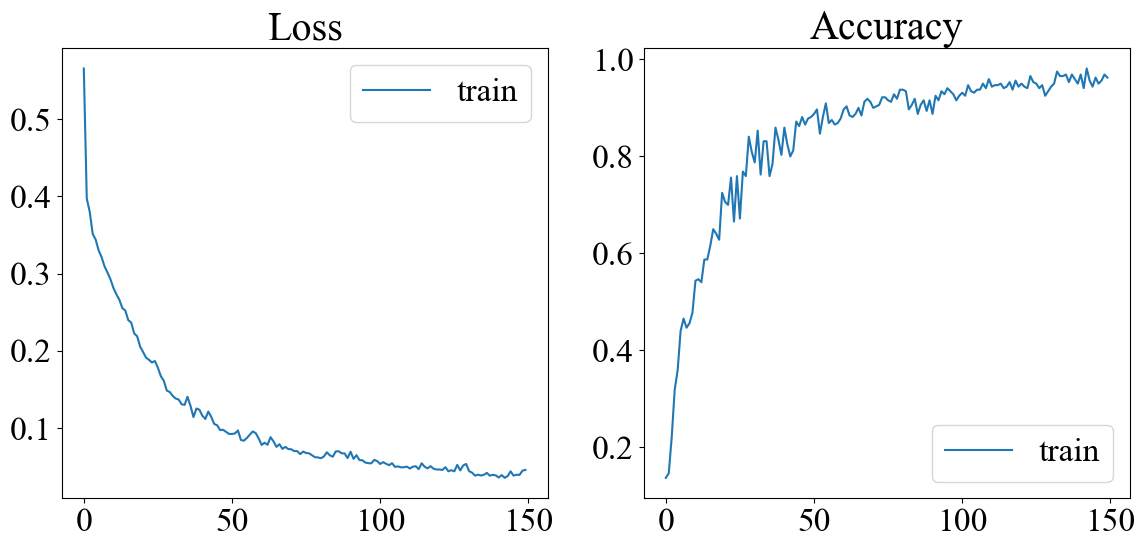

In [113]:
# Mostrar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
prediccion= model.predict(X_val)

3/3 [==============================] - 1s 55ms/step


In [10]:

y_pred = np.argmax(prediccion, axis=1)  # Convertir probabilidades a etiquetas

# Convertir etiquetas verdaderas a índices
y_true = np.argmax(y_val, axis=1)


In [11]:
f1 = f1_score(y_pred, y_true, average=None)  # Puedes elegir 'macro', 'micro' o 'weighted'
print("F1-score (micro-average):", f1)

# También puedes imprimir un reporte detallado que incluya precision, recall y F1-score por clase
report = classification_report(y_pred, y_true)
print("Reporte de clasificación:")
print(report)

F1-score (micro-average): [0.95238095 0.96551724 0.93333333 0.66666667 0.95238095 0.76190476
 1.         0.70588235]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8
           3       1.00      0.50      0.67         4
           4       0.91      1.00      0.95        10
           5       0.80      0.73      0.76        11
           6       1.00      1.00      1.00        15
           7       0.67      0.75      0.71         8

    accuracy                           0.90        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.90      0.90      0.90        80



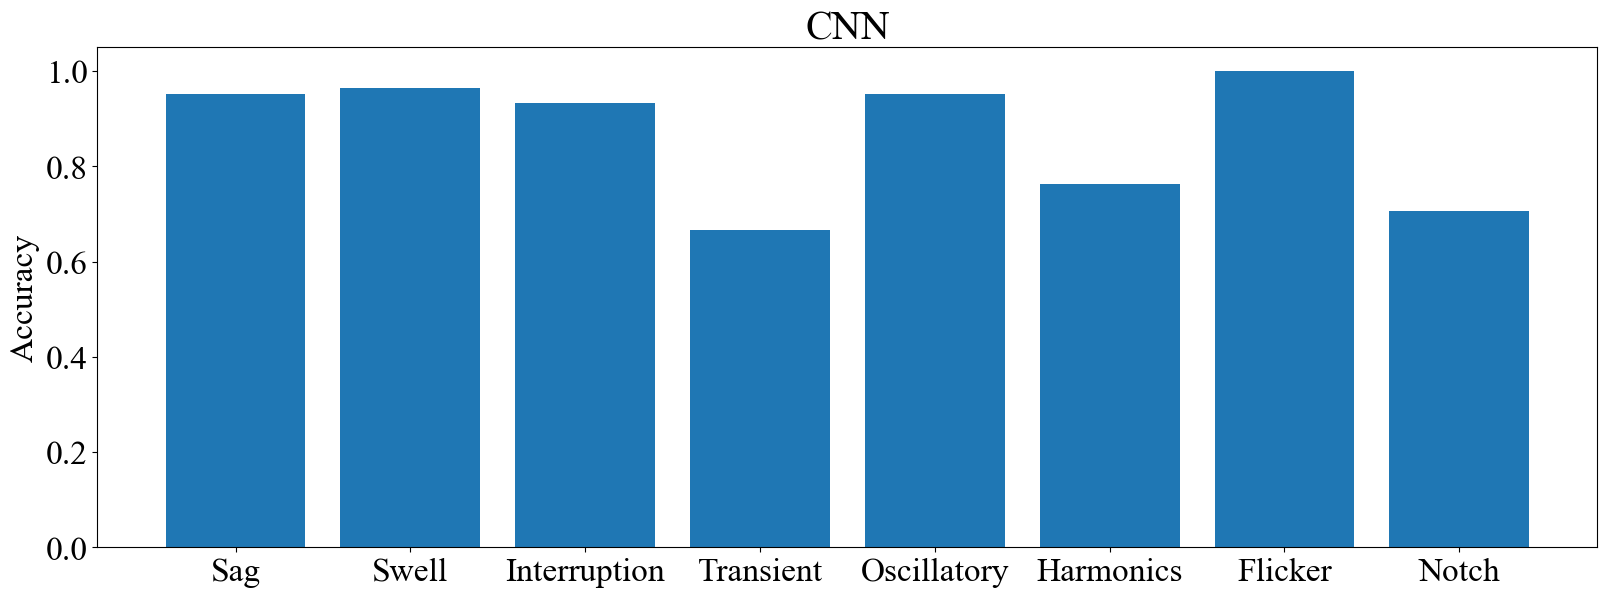

In [136]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])

ax.bar(Sig_names,f1)
ax.set_ylabel('Accuracy')
ax.set_title('CNN')

plt.savefig('Figures/barplot_CNN2D.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

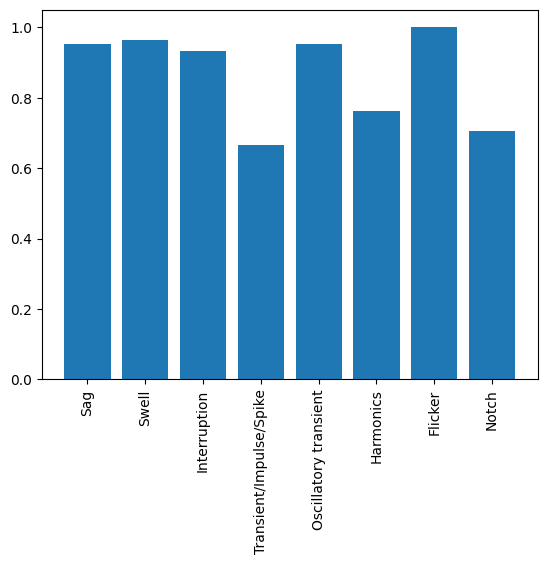

In [13]:
y_pos = range(len(Sig_names))
plt.bar(y_pos, f1)
plt.xticks(y_pos, Sig_names, rotation=90)
plt.show()

In [23]:
model.save('Models/CNN_model.h5')

In [64]:
from pandas import DataFrame

In [65]:
a = Model.PQselectivo(Signas_perEvent,Signal_List)

In [84]:
X_train_t, X_val_t = train_test_split(DataFrame(data.reshape(400,600)), test_size=0.2, random_state=42)

In [102]:
tt = np.load('test.npy')

26.0